In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proj = '51V'
trg = '147Sm'
cn = '198At'
bf = 0.69
ch = 'xn'

file_name10 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + str(bf) + '.dat'
file_name0 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_' + 'barfac' + str(bf) + '.dat'
print(file_name10, file_name0)

51V_147Sm_198At_xn_IFUS10_barfac0.69.dat 51V_147Sm_198At_xn_IFUS0_barfac0.69.dat


In [3]:
df10 = pd.read_csv('data/' + file_name10, sep='\t')
df0 = pd.read_csv('data/' + file_name0, sep='\t')

In [4]:
df10.head()

,E_lab,E*/MeV,192At,193At,194At,195At,196At,197At,198At
0,196.101,21.0,0.0,0.0,0.0,0.0,1.470000e-10,1.260000e-08,3.030000e-11
1,197.448,22.0,0.0,0.0,0.0,0.0,3.180000e-09,3.570000e-08,6.110000e-11
2,198.795,23.0,0.0,0.0,0.0,0.0,3.520000e-08,9.640000e-08,1.160000e-10
3,200.142,24.0,0.0,0.0,0.0,0.0,2.980000e-07,2.490000e-07,2.080000e-10
4,201.489,25.0,0.0,0.0,0.0,0.0,2.140000e-06,6.110000e-07,3.200000e-10


In [23]:
exp_data = pd.read_csv('data/exp_data.dat', sep=' ')

In [24]:
dfm10_mb = df10.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
dfm10_mb.head()

,E_lab,E*/MeV,isotope,CS
0,196.101,21.0,192At,0.0
1,197.448,22.0,192At,0.0
2,198.795,23.0,192At,0.0
3,200.142,24.0,192At,0.0
4,201.489,25.0,192At,0.0


/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'51V + 147Sm -> 198At, BF = 0.69'}, xlabel='$E^*$ [MeV]', ylabel='$\\sigma$ [$\\mu$b]'>

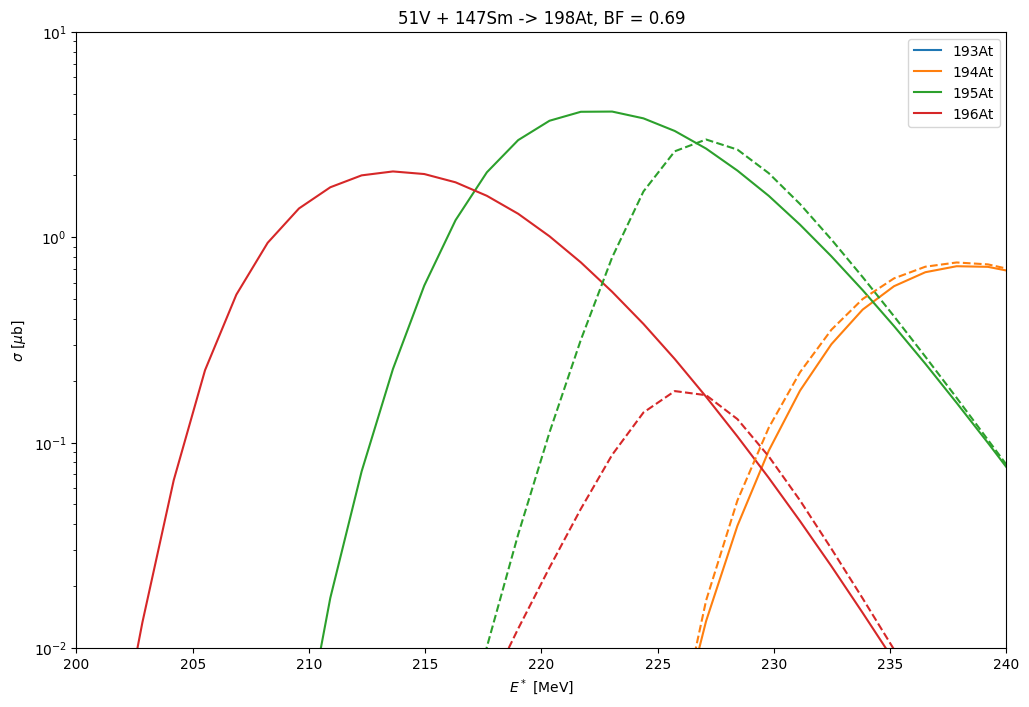

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[3:-2]))])
plt.semilogy()
plt.ylim(1e-2, 1e1)
# plt.xlim(right=50)
# plt.xlim(20, 80)
plt.xlim(200, 240)
plt.title(proj + ' + ' + trg + ' -> ' + cn + ', BF = ' + str(bf))
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[3:-2]))], linestyle='--', legend=None)

plt.scatter(x='')